In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt

from Like import *
from NeutrinoFuncs import *
from Params import *
from NeutrinoFuncs import BinnedNeutrinoRates
from WIMPFuncs import BinnedWIMPRate,MeanInverseSpeed_SHM,C_SI
from LabFuncs import FormFactorHelm

from multihist import Hist1d

In [2]:
def get_cmap(n, name='jet'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [3]:
#==============================================================================#
ne = 500 # number of energy bins (anything >50 is accurate enough)
nm = 200 # number of mass points
n_ex = 500 # number of exposure points (I wouldn't go below 250)
ns = 500 # number of cross section points (I wouldn't go below 250)
ex_min = 1e-5 # minimum exposure
ex_max = 1e19 # maximum exposure
m_vals = logspace(log10(0.1),log10(1.0e4),nm) # mass points
#==============================================================================#
Flux_norm = NuFlux # See Params.py
Flux_err = NuUnc # See Params.py
E_th = 1.0e-4 # Threshold
E_max = 500.0 # Max recoil energy
sigma_min = 1e-50 # Minimum cross section to scan over
sigma_max = 1e-43 # Maximum cross section to scan over
inp = 'NuFloor'+sys.argv[1]+'_detailed_SI' # Filename to save data to
#==============================================================================#
# This is a bit ugly but works for now
#Nuc = Xe131

In [ ]:
for i,nu in enumerate()

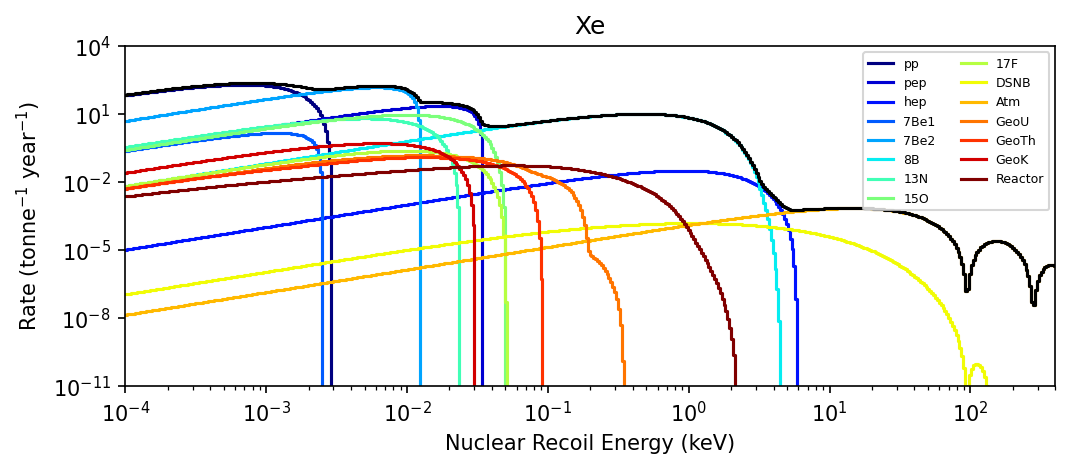

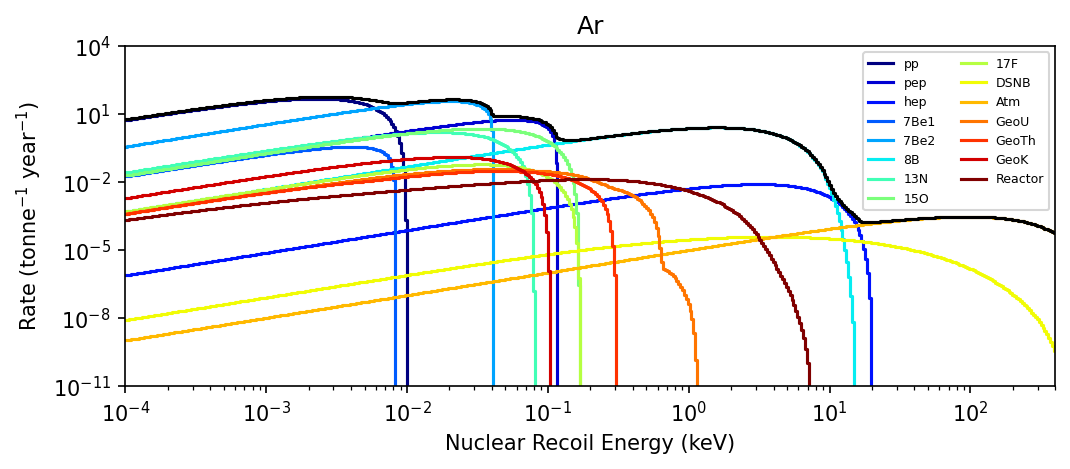

In [4]:
nucs = [ 'Xe', 'Ar' ]
nuc_list = [ Xe131, Ar40 ]
nuc_dict = {}

E_be = logspace(log10(E_th),log10(E_max),ne+1)

for i,nuc in enumerate(nucs):
    
    nuc_dict[nuc] = nuc_list[i]
    nuc_dict[nuc+'_rate'] = BinnedNeutrinoRates(E_th,E_max,ne,nuc_dict[nuc])
    
    hlist = []
    for i,nu in enumerate(nuname):
        #print(nu)
        hlist.append( Hist1d.from_histogram(nuc_dict[nuc+'_rate'][i,:],E_be) )
    nuc_dict[nuc+'_rhists'] = hlist
    
    htot = hlist[0].similar_blank_hist()
    for hnu in hlist:
        htot += hnu
    nuc_dict[nuc+'_tothist'] = htot
    
    #------------------ plot all nu together
    fig = plt.figure(figsize=(8,3),dpi=150)
    ax = fig.gca()
    cmap = get_cmap(len(nuname))
    for i,nu in enumerate(nuname):
        nuc_dict[nuc+'_rhists'][i].plot(color=cmap(i),label=nu)
    nuc_dict[nuc+'_tothist'].plot(color='black')

    ax.set_xlim(E_be[0],400)
    ax.set_ylim(1e-11,1e4)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Nuclear Recoil Energy (keV)')
    ax.set_ylabel('Rate (tonne$^{-1}$ year$^{-1}$)')
    ax.legend(loc='upper right',fontsize=6,ncol=2)
    ax.set_title(nuc)
    

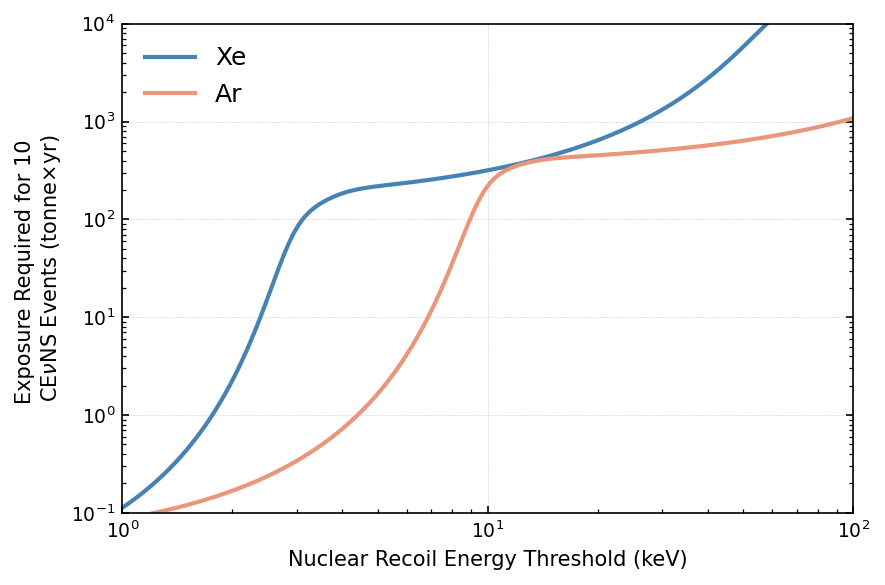

In [5]:
# exposure to get requested number of nu evts

n_evts = 10 # number of nu evts desired

colors = ['steelblue','darksalmon']

fig = plt.figure(figsize=(6,4),dpi=150)
ax = fig.gca()

for i,nuc in enumerate(nucs):
    
    r = nuc_dict[nuc+'_tothist'].histogram
    E_bc = nuc_dict[nuc+'_tothist'].bin_centers
    
    rate_th = np.array([ np.sum(r[E_bc>e]) for e in E_bc[:-1] ]) # 1/tonne/yrs
    expo = n_evts/rate_th # tonne-yrs to get n_evts
    
    plt.plot(E_bc[:-1],expo,lw=2,color=colors[i],label=nuc)

#ax.axvline(5.6*(1000./365.),linestyle='--',color='lightgrey')
ax.grid(linestyle='--',lw=0.3,color='lightgrey')

ax.set_xlabel('Nuclear Recoil Energy Threshold (keV)',fontsize=10)
ax.set_ylabel('Exposure Required for 10 \n' r'CE$\nu$NS Events (tonne$\times$yr)',fontsize=10)

ax.tick_params(direction='in',axis='both', which='both', labelsize=9)
ax.tick_params(which='both',right=True)

#xmin = E_be[0]
xmin = 1e0
xmax = 1e2 #E_be[-1]
ymin = 1e-1
ymax = 1e4

#ytickstep = 10
#xtickstep = 1
#ax.xaxis.set_ticks(np.arange(xmin, xmax+xtickstep, xtickstep))
#ax.yaxis.set_ticks(np.arange(ymin, ymax+ytickstep, ytickstep))

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')

ax.legend(loc='upper left',fontsize=12,ncol=1,frameon=False,framealpha=0.3,edgecolor='white')

plt.tight_layout()

#plt.savefig('./expo_10evts_zoom.png')

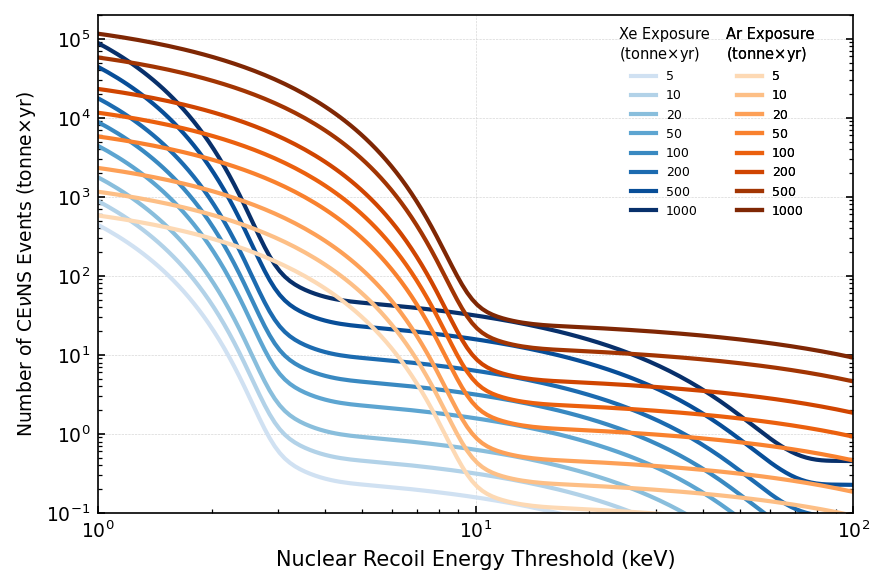

In [6]:
# number of nu evts for various exposures
from matplotlib import cm
expos = np.array([5,10,20,50,100,200,500,1000]) #tonne-yrs

start = 0.2
stop = 1.0
ncolor = len(expos)
cm_subsection = linspace(start, stop, ncolor) 
xe_colors = [ cm.Blues(x) for x in cm_subsection ]
ar_colors = [ cm.Oranges(x) for x in cm_subsection ]

fig = plt.figure(figsize=(6,4),dpi=150)
ax = fig.gca()

for i,nuc in enumerate(nucs):
    
    r = nuc_dict[nuc+'_tothist'].histogram
    E_bc = nuc_dict[nuc+'_tothist'].bin_centers
    rate_th = np.array([ np.sum(r[E_bc>e]) for e in E_bc[:-1] ]) # 1/tonne/yrs
    
    for n,expo in enumerate(expos):
        evts = rate_th*expo
        #lab = r'{:.0f} tonne$\times$yr'.format(expo)
        lab = r'{:.0f}'.format(expo)
        if nuc=='Xe':
            plt.plot(E_bc[:-1],evts,lw=2,color=xe_colors[n],label=lab)
        if nuc=='Ar':
            plt.plot(E_bc[:-1],evts,lw=2,color=ar_colors[n],label=lab)

handles, labels = ax.get_legend_handles_labels()

ax.grid(linestyle='--',lw=0.3,color='lightgrey')

ax.set_xlabel('Nuclear Recoil Energy Threshold (keV)',fontsize=10)
#ax.set_ylabel('Exposure Required for 10 \n' r'CE$\nu$NS Events (tonne$\times$yr)',fontsize=10)
ax.set_ylabel(r'Number of CE$\nu$NS Events (tonne$\times$yr)',fontsize=9)

ax.tick_params(direction='in',axis='both', which='both', labelsize=9)
ax.tick_params(which='both',right=True)

#xmin = E_be[0]
xmin = 1e0
xmax = 1e2 #E_be[-1]
ymin = 1e-1
ymax = 2e5

#ytickstep = 10
#xtickstep = 1
#ax.xaxis.set_ticks(np.arange(xmin, xmax+xtickstep, xtickstep))
#ax.yaxis.set_ticks(np.arange(ymin, ymax+ytickstep, ytickstep))

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_yscale('log')
ax.set_xscale('log')

#ax.legend(loc='upper right',fontsize=4,ncol=1,frameon=False,framealpha=0.3,edgecolor='white')

handlesxe = handles[0:len(expos)]
labelsxe = labels[0:len(expos)]
handlesar = handles[len(expos):len(expos)*2]
labelsar = labels[len(expos):len(expos)*2]

leg1 = ax.legend( handlesxe,labelsxe,loc='lower center',bbox_to_anchor=(0.75, 0.57),
                 fontsize=6,title='Xe Exposure\n' r'(tonne$\times$yr)',title_fontsize=7,
                 frameon=False,framealpha=0.3,edgecolor='white')
plt.gca().add_artist(leg1)
leg2 = ax.legend( handlesar,labelsar,loc='lower center',bbox_to_anchor=(0.89, 0.57),
                 fontsize=6,title='Ar Exposure\n' r'(tonne$\times$yr)',title_fontsize=7,
                 frameon=False,framealpha=0.3,edgecolor='white')
plt.gca().add_artist(leg2)

plt.tight_layout()

#plt.savefig('./cevns_evts_threshold.png')

[None, None]

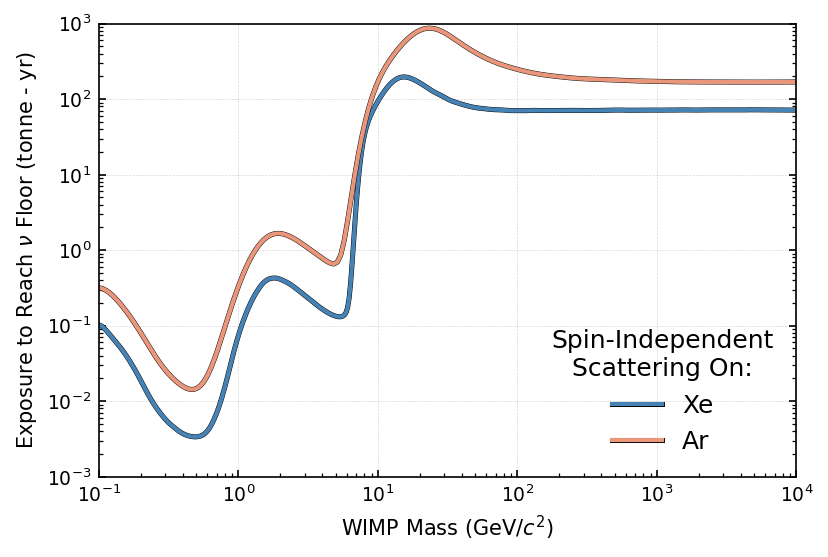

In [7]:
## plot exposure to reach n=2 point.. the floor

import matplotlib.patheffects as pe

xe_data = loadtxt('../data/exposure_at_floor_Xe.txt')
ar_data = loadtxt('../data/exposure_at_floor_Ar.txt')

def line_background(lw,col):
    return [pe.Stroke(linewidth=lw, foreground=col), pe.Normal()]

pek = line_background(2.4,'k')

fig = plt.figure(figsize=(6,4),dpi=150)
ax = fig.gca()

plt.plot(xe_data[:,0],xe_data[:,1],lw=2,color='steelblue',path_effects=pek,label='Xe')
plt.plot(ar_data[:,0],ar_data[:,1],lw=2,color='darksalmon',path_effects=pek,label='Ar')

ax.grid(linestyle='--',lw=0.3,color='lightgrey')

ax.set_xlabel(r'WIMP Mass (GeV$/c^2$)',fontsize=10)
#ax.set_ylabel(r'Exposure to Reach $n=2$ (tonne$^{-1}$ yr$^{-1}$)',fontsize=10)
ax.set_ylabel(r'Exposure to Reach $\nu$ Floor (tonne - yr)',fontsize=10)

# Plot Range
xmin = 1e-1
xmax = 1e4
ymin = 1e-3
ymax = 1e3

ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_yscale('log')
ax.set_xscale('log')

# Ticks
ax.tick_params(direction='in',axis='both', which='both', labelsize=9)
ax.tick_params(which='both',right=True)

leg = ax.legend(loc='lower right',fontsize=12,ncol=1,
          title='Spin-Independent\nScattering On:',title_fontsize=12,
          frameon=False,framealpha=0.3,edgecolor='white')
plt.setp(leg.get_title(), multialignment='center')

#plt.savefig('./exposure_at_floor.png')

In [ ]:
nuc_list = [ Xe131, Ar40 ]
nuc_dict = {}

nuc_list = [ Xe131, Ar40 ]
rates = []

E_be = logspace(log10(E_th),log10(E_max),ne+1)

for Nuc in nuc_list:
    rates.append( BinnedNeutrinoRates(E_th,E_max,ne,Nuc) )
    
    hlist = []
    for i,nu in enumerate(nuname):
    print(nu)
    hlist.append( Hist1d.from_histogram(rate[i,:],E_be) )

htot = hlist[0].similar_blank_hist()
for hnu in hlist:
    htot += hnu
    

In [4]:
rate = BinnedNeutrinoRates(E_th,E_max,ne,Nuc)
E_be = logspace(log10(E_th),log10(E_max),ne+1)

In [9]:
print(np.shape(rate))
print(np.shape(E_be))

hlist = []
for i,nu in enumerate(nuname):
    print(nu)
    hlist.append( Hist1d.from_histogram(rate[i,:],E_be) )

htot = hlist[0].similar_blank_hist()
for hnu in hlist:
    htot += hnu

(15, 500)
(501,)
pp
pep
hep
7Be1
7Be2
8B
13N
15O
17F
DSNB
Atm
GeoU
GeoTh
GeoK
Reactor


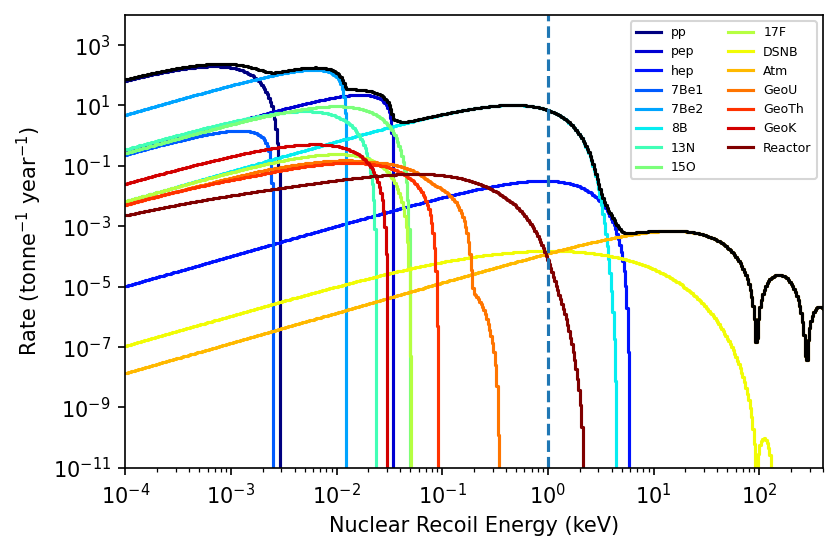

In [10]:
fig = plt.figure(dpi=150)
ax = fig.gca()

cmap = get_cmap(len(nuname))

my_thresh = 1 # keV

for i,nu in enumerate(nuname):
    hlist[i].plot(color=cmap(i),label=nu)

htot.plot(color='black')
ax.axvline(my_thresh,linestyle='--')

ax.set_xlim(E_be[0],400)
#ax.set_xlim(1,400)
ax.set_ylim(1e-11,1e4)
#ax.set_ylim(1e-11,2000)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Nuclear Recoil Energy (keV)')
ax.set_ylabel('Rate (tonne$^{-1}$ year$^{-1}$)')
ax.legend(loc='upper right',fontsize=6,ncol=2)

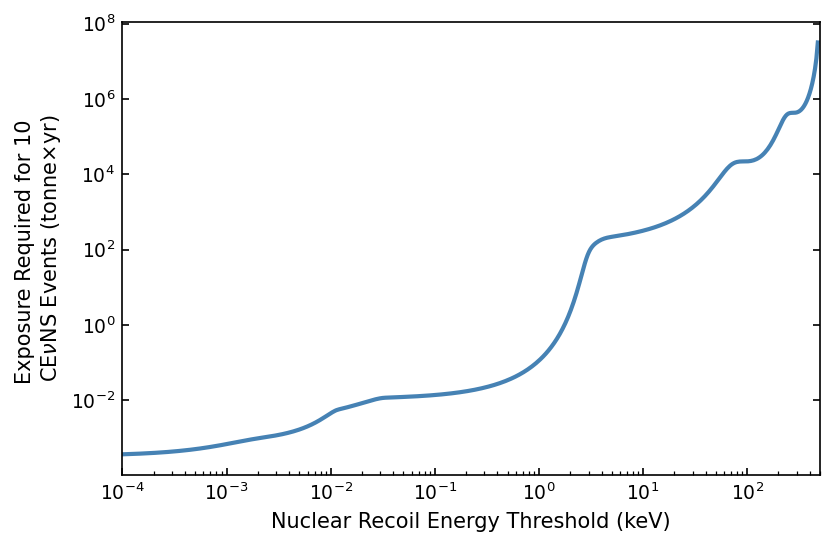

In [22]:
# get rate above moving threshold
r = htot.histogram
E_bc = htot.bin_centers
n_evts = 10 # number of nu evts desired

rate_th = np.array([ np.sum(r[E_bc>e]) for e in E_bc[:-1] ]) # 1/tonne/yrs
expo = n_evts/rate_th # tonne-yrs to get n_evts

# --------------------------------------------------------------
# make plot

fig = plt.figure(dpi=150)
ax = fig.gca()

plt.plot(E_bc[:-1],expo,lw=2,color='steelblue')
#ax.axvline(my_thresh,linestyle='--')

ax.set_xlabel('Nuclear Recoil Energy Threshold (keV)')
ax.set_ylabel('Exposure Required for 10 \n' r'CE$\nu$NS Events (tonne$\times$yr)')

ax.tick_params(direction='in',axis='both', which='both', labelsize=9)
ax.tick_params(which='both',right=True)

ax.set_xlim(E_be[0],E_be[-1])
#ax.set_ylim(1e-11,1e4)
ax.set_yscale('log')
ax.set_xscale('log')

#ax.legend(loc='upper right',fontsize=6,ncol=2)

In [7]:
# print the fraction of recoil spectrum that is above my_thresh
for i,nu in enumerate(nuname):
    r = hlist[i].histogram
    E_bc = hlist[i].bin_centers    
    frac = np.sum(r[E_bc>my_thresh])/np.sum(r)
    print('{:s}: {:0.3f}'.format(nu,frac))
    

pp: 0.000
pep: 0.000
hep: 0.303
7Be1: 0.000
7Be2: 0.000
8B: 0.097
13N: 0.000
15O: 0.000
17F: 0.000
DSNB: 0.434
Atm: 0.931
GeoU: 0.000
GeoTh: 0.000
GeoK: 0.000
Reactor: 0.000


In [44]:
hlist[5].bin_volumes()

array([3.36658917e-05, 4.49998143e-05, 6.01494031e-05, 8.03992359e-05,
       1.07466356e-04, 1.43645863e-04, 1.92005523e-04, 2.56645894e-04,
       3.43048023e-04, 4.58538199e-04, 6.12909173e-04, 8.19250511e-04,
       1.09505850e-03, 1.46371971e-03, 1.95649400e-03, 2.61516515e-03,
       3.49558382e-03, 4.67240328e-03, 6.24540951e-03, 8.34798231e-03,
       1.11584050e-02, 1.49149815e-02, 1.99362431e-02, 2.66479571e-02,
       3.56192294e-02, 4.76107606e-02, 6.36393477e-02, 8.50641016e-02,
       1.13701690e-01, 1.51980378e-01, 2.03145927e-01, 2.71536815e-01,
       3.62952105e-01, 4.85143167e-01, 6.48470940e-01, 8.66784464e-01,
       1.15859518e+00, 1.54864658e+00, 2.07001226e+00, 2.76690035e+00,
       3.69840203e+00, 4.94350205e+00, 6.60777609e+00, 8.83234283e+00,
       1.18058298e+01, 1.57803677e+01, 2.10929692e+01, 2.81941053e+01,
       3.76859023e+01, 5.03731973e+01])

In [46]:
0.5*(E_be[1:]-E_be[0:-1])

array([1.68329458e-05, 2.24999072e-05, 3.00747015e-05, 4.01996180e-05,
       5.37331778e-05, 7.18229313e-05, 9.60027615e-05, 1.28322947e-04,
       1.71524012e-04, 2.29269100e-04, 3.06454586e-04, 4.09625255e-04,
       5.47529250e-04, 7.31859855e-04, 9.78247001e-04, 1.30758258e-03,
       1.74779191e-03, 2.33620164e-03, 3.12270476e-03, 4.17399116e-03,
       5.57920250e-03, 7.45749077e-03, 9.96812153e-03, 1.33239785e-02,
       1.78096147e-02, 2.38053803e-02, 3.18196739e-02, 4.25320508e-02,
       5.68508449e-02, 7.59901888e-02, 1.01572963e-01, 1.35768407e-01,
       1.81476052e-01, 2.42571584e-01, 3.24235470e-01, 4.33392232e-01,
       5.79297592e-01, 7.74323291e-01, 1.03500613e+00, 1.38345018e+00,
       1.84920101e+00, 2.47175102e+00, 3.30388805e+00, 4.41617142e+00,
       5.90291490e+00, 7.89018384e+00, 1.05464846e+01, 1.40970527e+01,
       1.88429511e+01, 2.51865987e+01])

In [59]:
dRdE = dRdE_8B(E_be,Nuc=Xe131,f_eff=None,f_eres=None)
R = 0.5*(E_be[1:]-E_be[0:-1])*(dRdE[1:]+dRdE[0:-1])

Text(0, 0.5, 'Rate (tonne$^{-1}$ year$^{-1}$ keV$^{-1}$)')

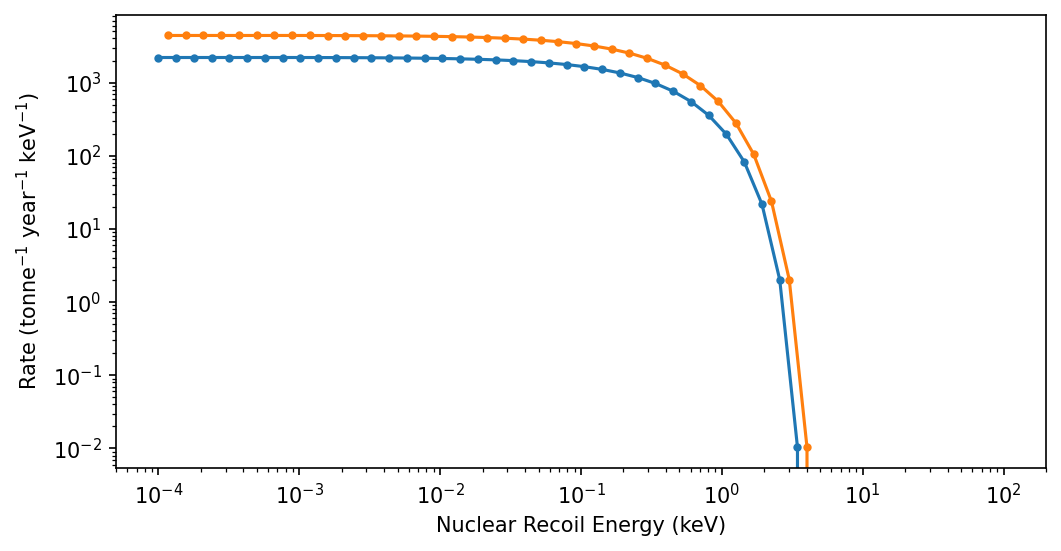

In [61]:
fig = plt.figure(figsize=(8,4),dpi=150)
ax = fig.gca()

plt.plot(E_be,dRdE,marker='.')
plt.plot(0.5*(E_be[1:]+E_be[0:-1]),dRdE[1:]+dRdE[0:-1],marker='.')


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(E_be[0]*0.5,E_be[-1])
ax.set_xlabel('Nuclear Recoil Energy (keV)')
ax.set_ylabel('Rate (tonne$^{-1}$ year$^{-1}$ keV$^{-1}$)')

Text(0, 0.5, 'Rate (tonne$^{-1}$ year$^{-1}$)')

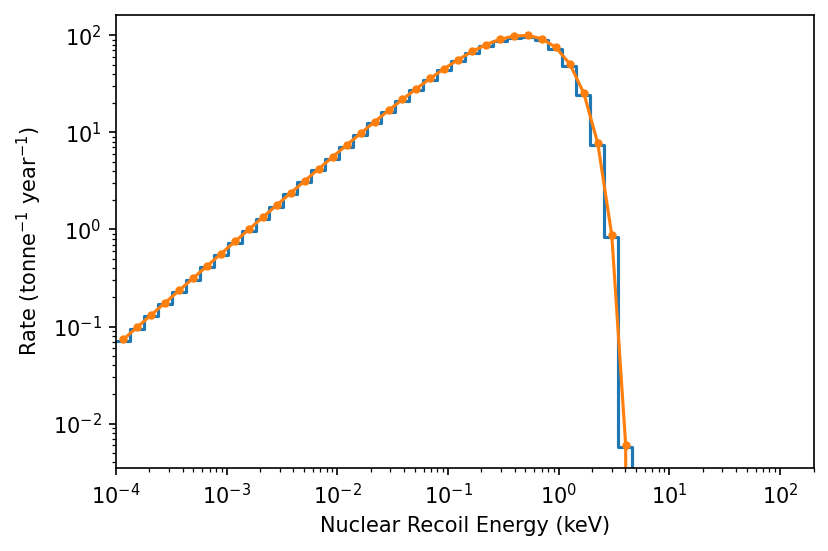

In [62]:
fig = plt.figure(dpi=150)
ax = fig.gca()
hR.plot()
plt.plot(0.5*(E_be[1:]+E_be[0:-1]),R,marker='.')

ax.set_xlim(E_be[0],E_be[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Nuclear Recoil Energy (keV)')
ax.set_ylabel('Rate (tonne$^{-1}$ year$^{-1}$)')

../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


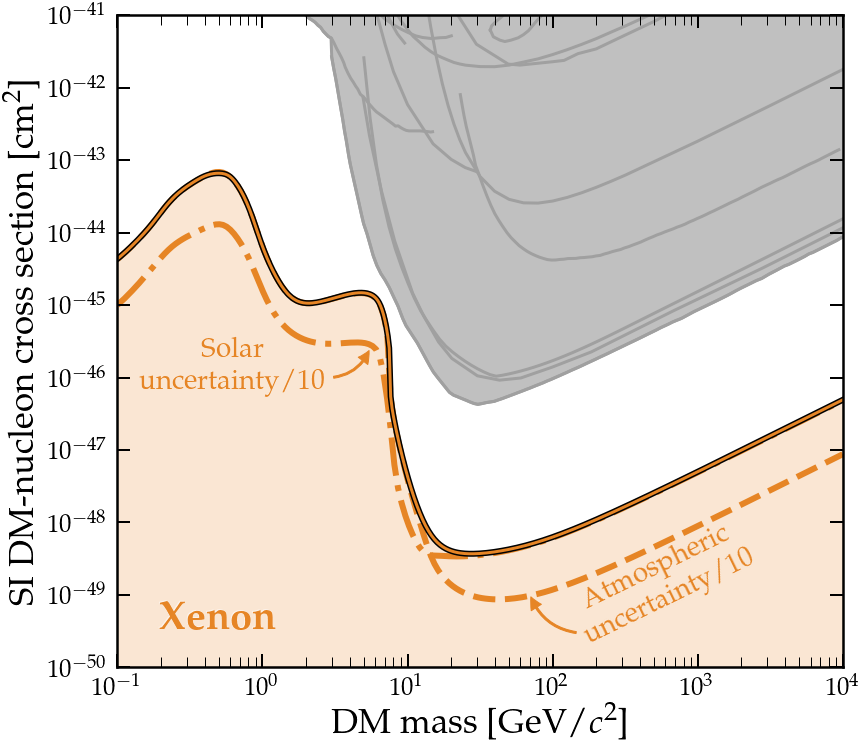

In [36]:
fig,ax = MakeLimitPlot_SI(Collected=True,alph=1,edgecolor=col_alpha('gray',0.75),facecolor=col_alpha('gray',0.5),ymin=1e-50,ymax=1e-41)
 
data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI.txt')
m,sig,NUFLOOR,DY = Floor_2D(data)
plt.fill_between(m,NUFLOOR,y2=1e-99,color=nufloor_col,alpha=0.2)
plt.plot(m,NUFLOOR,color=nufloor_col,lw=3,path_effects=pek,zorder=1)

data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_TenthSolarUncertainty.txt')
m,sig,NUFLOOR,DY = Floor_2D(data,filt=True,filt_width=1)
plt.plot(m,NUFLOOR,'-.',color=nufloor_col,lw=6,alpha=1,zorder=0.9)

data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_TenthAtmUncertainty.txt')
m,sig,NUFLOOR,DY = Floor_2D(data,filt=True,filt_width=1)
plt.plot(m,NUFLOOR,'--',color=nufloor_col,lw=6,alpha=1,zorder=0.5)

plt.text(0.62,8e-47,'Solar \n uncertainty/10',color=nufloor_col,rotation=0,rotation_mode='anchor',ha='center',fontsize=28,alpha=1)
plt.text(0.65e3,0.9e-49,'Atmospheric \n uncertainty/10',color=nufloor_col,rotation=26,rotation_mode='anchor',ha='center',fontsize=28,alpha=1)

CurvedArrow(1.5e2,0.7e2,0.3e-49,1.0e-49,color=nufloor_col,alpha=1,connectionstyle="arc3,rad=-0.3")
CurvedArrow(3e0, 5.5e0,1e-46,2.5e-46,color=nufloor_col,alpha=1,connectionstyle="arc3,rad=0.3")

plt.gcf().text(0.17*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='w',fontsize=40,alpha=0.5)
plt.gcf().text(0.17,0.17,r'{\bf Xenon}',color=nufloor_col,fontsize=40)

MySaveFig(fig,'NuFloor_vs_Uncertainties')

../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:94: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:69: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0]

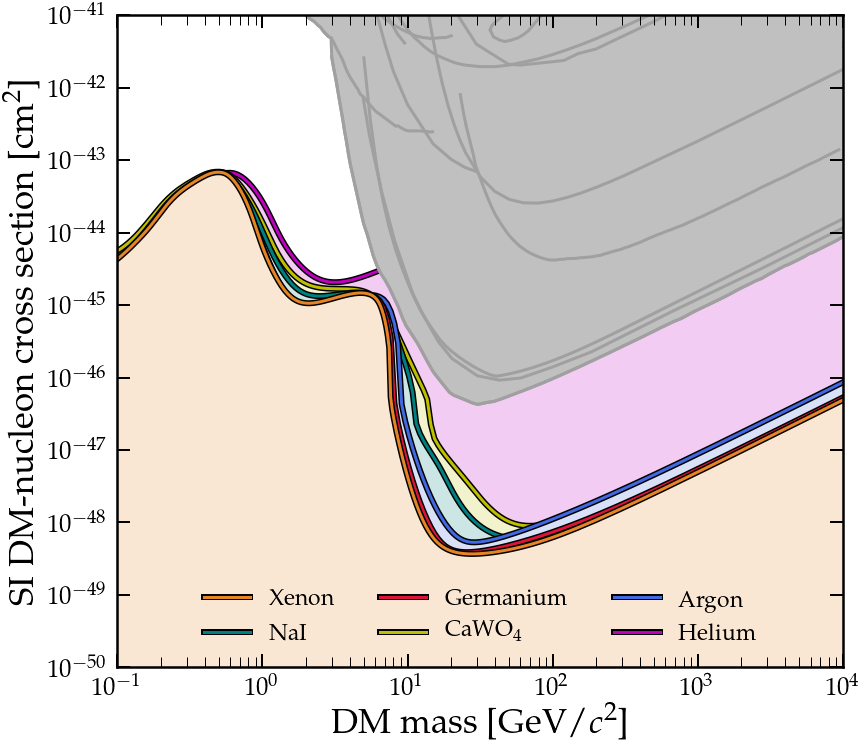

In [37]:
fig,ax = MakeLimitPlot_SI(Collected=True,alph=1,edgecolor=col_alpha('gray',0.75),facecolor=col_alpha('gray',0.5),ymin=1e-50,ymax=1e-41)
      
alph = 0.2
nucs = ['Xe','Ge','Ar','NaI','CaWO4','He']
zos = [-100,-200,-300,-400,-500,-600]
cols = [nufloor_col,'crimson','royalblue','teal','y','m']

for col,nuc,zo in zip(cols,nucs,zos):
    data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloor'+nuc+'_detailed_SI.txt')
    m,sig,NUFLOOR,DY = Floor_2D(data,filt=True,filt_width=2)
    plt.fill_between(m,NUFLOOR,y2=1e-99,color=col_alpha(col,alph),zorder=zo)
    plt.plot(m,NUFLOOR,color=col,lw=3,path_effects=pek,zorder=zo)

# data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorTargets_Ge.txt')
# m,sig_f,dy = MakeNuFloor_2D(data)
# plt.contourf(m,sig_f,dy,levels=[-inf,-2],zorder=-200,colors=[col_alpha('crimson',0.2)])
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-200,linewidths=6,colors='k',linestyles='-')
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-200,linewidths=3,colors='crimson',linestyles='-')

# data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorTargets_Ar.txt')
# m,sig_f,dy = MakeNuFloor_2D(data)
# plt.contourf(m,sig_f,dy,levels=[-inf,-2],zorder=-300,colors=[col_alpha('royalblue',0.2)])
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-300,linewidths=6,colors='k',linestyles='-')
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-300,linewidths=3,colors='royalblue',linestyles='-')

# data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorTargets_NaI.txt')
# m,sig_f,dy = MakeNuFloor_2D(data)
# plt.contourf(m,sig_f,dy,levels=[-inf,-2],zorder=-400,colors=[col_alpha('teal',0.2)])
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-400,linewidths=6,colors='k',linestyles='-')
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-400,linewidths=3,colors='teal',linestyles='-')

# data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorTargets_CaWO4.txt')
# m,sig_f,dy = MakeNuFloor_2D(data)
# plt.contourf(m,sig_f,dy,levels=[-inf,-2],zorder=-500,colors=[col_alpha('y',0.2)])
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-500,linewidths=6,colors='k',linestyles='-')
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-500,linewidths=3,colors='y',linestyles='-')

# data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorTargets_He.txt')
# m,sig_f,dy = MakeNuFloor_2D(data,sigma_max=1e-42)
# plt.contourf(m,sig_f,dy,levels=[-inf,-2],zorder=-600,colors=[col_alpha('#d41980',0.2)])
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-600,linewidths=6,colors='k',linestyles='-')
# plt.contour(m,sig_f,dy,levels=[-2],zorder=-600,linewidths=3,colors='#d41980',linestyles='-')


plt.plot([],[],'-',color='#e68525',lw=3,label='Xenon',path_effects=pek)
plt.plot([],[],'-',color='teal',lw=3,label='NaI',path_effects=pek)
plt.plot([],[],'-',color='crimson',lw=3,label=r'Germanium',path_effects=pek)
plt.plot([],[],'-',color='y',lw=3,label=r'CaWO$_4$',path_effects=pek)
plt.plot([],[],'-',color='royalblue',lw=3,label='Argon',path_effects=pek)
plt.plot([],[],'-',color='m',lw=3,label='Helium',path_effects=pek)

plt.legend(frameon=False,loc='lower center',ncol=3,fontsize=23)

MySaveFig(fig,'NuFloor_Targets_SI')

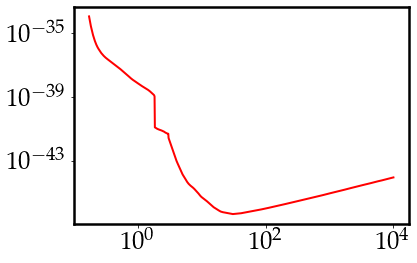

In [3]:
dat1 = loadtxt("../data/WIMPLimits/SI/CRESST.txt")

dat2 = loadtxt("../data/WIMPLimits/SI/CDMSLite.txt")

dat3= loadtxt("../data/WIMPLimits/SI/DarkSide.txt")

dat4 =  loadtxt("../data/WIMPLimits/SI/PandaX.txt")

dat5 = loadtxt("../data/WIMPLimits/SI/XENON1T.txt")

dats = [dat1,dat2,dat3,dat4,dat5]

mmin = amin(dat1[:,0])
mmax = 1e4
mvals = logspace(log10(mmin),log10(mmax),1000)

sig = zeros(shape=1000)
for dat in dats:
    sig1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    sig1[mvals<amin(dat[:,0])] = inf
    sig1[mvals>amax(dat[:,0])] = inf
    sig = column_stack((sig,sig1))
sig = sig[:,1:]

sig = amin(sig,1)

plt.loglog(mvals,sig,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('../data/WIMPLimits/SI/AllLimits-2021.txt',column_stack((mvals,sig)))


In [9]:
zip([nucs,zos,cols])